in this notebook, we will use the preprocessed data using approach 2 to classify eyesopen, eyesclosed using the following method

Method 1
- classify using only the following channels [27, 28, 29, 30, 57, 58, 59 ,60] these are channels related to occipital

Method 2
- Use only the Oz channel

Method 3
- all occipital channels plus P3, P4

In [1]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [4]:
%cd /content/drive/MyDrive/colab_notebooks/algovera/lynxhack

/content/drive/MyDrive/colab_notebooks/algovera/lynxhack


In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
import pandas as pd
import numpy as np
import pickle

In [9]:
df = pd.read_csv('approach2infos.csv')

In [10]:
df = df[df['label'].isin(['task-eyes closed', 'task-eyes open'])]

In [11]:
df_train = df[df['is_valid']==False]
df_val = df[df['is_valid']==True]

In [20]:
ss = pickle.load(open('ss_approach2.pkl', 'rb'))

## Method 1

In [21]:
include = [27, 28, 29, 30, 57, 58, 59 ,60] # only channels related to occipital
train_f = []
for fn in df_train.fns.values:
    temp = np.load(fn)
    temp = ss.transform(temp)
    train_f.append(temp[include])

val_f = []
for fn in df_val.fns.values:
    temp = np.load(fn)
    temp = ss.transform(temp)
    val_f.append(temp[include])

In [22]:
label_index = {
    'task-eyes closed':0, 
    'task-eyes open':1,       
}

In [23]:
train_l = []
for l in df_train.label.values:
    train_l.append(label_index[l])

val_l = []
for l in df_val.label.values:
    val_l.append(label_index[l])

In [24]:
train_f2 = np.stack(train_f, 0)
val_f2 = np.stack(val_f, 0)

train_l2 = np.stack(train_l)
val_l2 = np.stack(val_l)

In [25]:
rfc = RandomForestClassifier(
    n_estimators=250
)

In [29]:
rfc.fit(train_f2.reshape(train_f2.shape[0], -1), train_l)

RandomForestClassifier(n_estimators=250)

In [32]:
preds = rfc.predict(val_f2.reshape(val_f2.shape[0], -1))

In [35]:
accuracy_score(val_l, preds)

0.7241379310344828

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


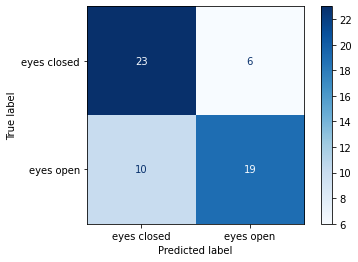

In [42]:
plot_confusion_matrix(rfc, 
                      val_f2.reshape(val_f2.shape[0], -1), 
                      val_l, 
                      display_labels=np.array(['eyes closed', 'eyes open']),
                      cmap='Blues')

## Method 2

In [43]:
include = [29] # only the Oz channels
train_f = []
for fn in df_train.fns.values:
    temp = np.load(fn)
    temp = ss.transform(temp)
    train_f.append(temp[include])

val_f = []
for fn in df_val.fns.values:
    temp = np.load(fn)
    temp = ss.transform(temp)
    val_f.append(temp[include])

In [44]:
train_l = []
for l in df_train.label.values:
    train_l.append(label_index[l])

val_l = []
for l in df_val.label.values:
    val_l.append(label_index[l])

In [45]:
train_f2 = np.stack(train_f, 0)
val_f2 = np.stack(val_f, 0)

train_l2 = np.stack(train_l)
val_l2 = np.stack(val_l)

In [46]:
rfc_2 = RandomForestClassifier(
    n_estimators=250
)

In [47]:
rfc_2.fit(train_f2.reshape(train_f2.shape[0], -1), train_l)

RandomForestClassifier(n_estimators=250)

In [48]:
preds = rfc_2.predict(val_f2.reshape(val_f2.shape[0], -1))

In [49]:
accuracy_score(val_l, preds)

0.7413793103448276

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


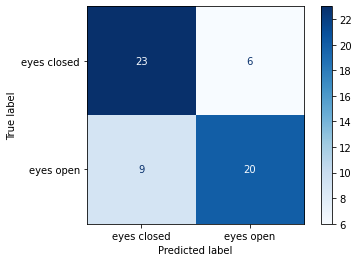

In [51]:
plot_confusion_matrix(rfc_2, 
                      val_f2.reshape(val_f2.shape[0], -1), 
                      val_l, 
                      display_labels=np.array(['eyes closed', 'eyes open']),
                      cmap='Blues')

## Method 3

In [52]:
include = [24, 27, 28, 29, 30, 54, 57, 58, 59 ,60] # only channels related to occipital
train_f = []
for fn in df_train.fns.values:
    temp = np.load(fn)
    temp = ss.transform(temp)
    train_f.append(temp[include])

val_f = []
for fn in df_val.fns.values:
    temp = np.load(fn)
    temp = ss.transform(temp)
    val_f.append(temp[include])

In [53]:
label_index = {
    'task-eyes closed':0, 
    'task-eyes open':1,       
}

In [54]:
train_l = []
for l in df_train.label.values:
    train_l.append(label_index[l])

val_l = []
for l in df_val.label.values:
    val_l.append(label_index[l])

In [55]:
train_f2 = np.stack(train_f, 0)
val_f2 = np.stack(val_f, 0)

train_l2 = np.stack(train_l)
val_l2 = np.stack(val_l)

In [56]:
rfc_3 = RandomForestClassifier(
    n_estimators=250
)

In [57]:
rfc_3.fit(train_f2.reshape(train_f2.shape[0], -1), train_l)

RandomForestClassifier(n_estimators=250)

In [58]:
preds = rfc_3.predict(val_f2.reshape(val_f2.shape[0], -1))

In [59]:
accuracy_score(val_l, preds)

0.7241379310344828

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


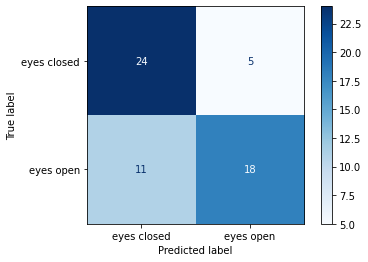

In [60]:
plot_confusion_matrix(rfc_3, 
                      val_f2.reshape(val_f2.shape[0], -1), 
                      val_l, 
                      display_labels=np.array(['eyes closed', 'eyes open']),
                      cmap='Blues')